In [1]:

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import seaborn as sns
# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline
import pandas as pd
from numpy import inf

In [2]:

d=pd.read_csv("house_prices_data_training_data.csv")
#prepare the data
# remove first 2 columns of  id and date and price to normalize data
#remove nan
d=d.dropna()
data=d.drop(['id','date'],axis=1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,3.0,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,5.0,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,4.0,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,3.0,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


data shape (17999, 19)
price            1.000000
bedrooms         0.302998
bathrooms        0.523706
sqft_living      0.701492
sqft_lot         0.088863
floors           0.280903
waterfront       0.275296
view             0.403321
condition        0.047493
grade            0.662583
sqft_above       0.604963
sqft_basement    0.324877
yr_built         0.036774
yr_renovated     0.137104
zipcode          0.042484
lat              0.309013
long             0.011829
sqft_living15    0.599256
sqft_lot15       0.078733
Name: price, dtype: float64


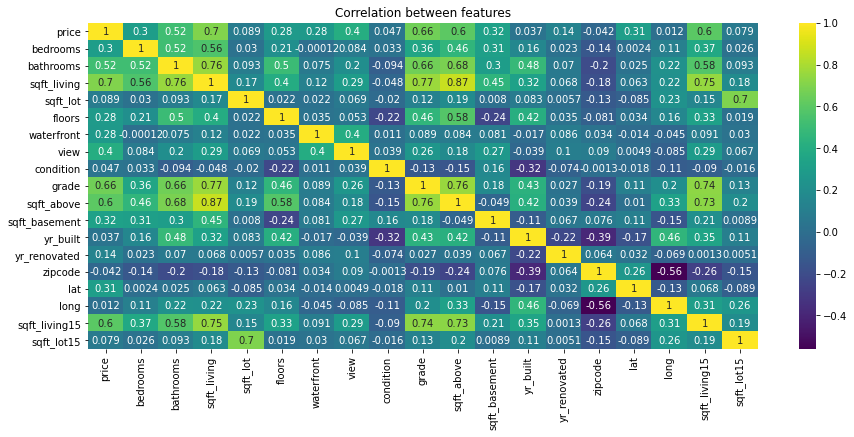

In [3]:
print("data shape", data.shape)
#choose features with high correlation with the price
r=data.corr()
rprice=abs(r["price"])
print(rprice)

plt.figure(figsize=(15,6))
plt.title('Correlation between features')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
plt.show()



In [4]:
data=data.drop(columns =['bedrooms','sqft_lot','floors','waterfront','view','condition','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15'])

In [5]:
train, validate, test = \
              np.split(data.sample(frac=1, random_state=4), 
                       [int(.6*len(data)), int(.8*len(data))])

x_train, y_train = train.iloc[:,1:], train.iloc[:, 0]
x_validate, y_validate = validate.iloc[1:,1:], validate.iloc[1:, 0]
x_test, y_test = test.iloc[1:,1:], test.iloc[1:, 0]


mtrain = y_train.size  # number of training examples
mvalidate = y_validate.size
mtest = y_test.size

print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)

(10799, 5)
(3599, 5)
(3599, 5)


In [6]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma

In [7]:
# call featureNormalize on the loaded data
x_normtrain, mutrain, sigmatrain = featureNormalize(x_train)
x_normv, muv, sigmav = featureNormalize(x_validate)
x_normtest, mutest, sigmatest = featureNormalize(x_test)


print('Computed mean for trained data:', mutrain)
print('Computed standard deviation for trained data:', sigmatrain)


Computed mean for trained data: bathrooms           2.057366
sqft_living      2053.345402
grade               7.592740
sqft_above       1753.288360
sqft_living15    1975.744050
dtype: float64
Computed standard deviation for trained data: bathrooms          0.753013
sqft_living      896.570429
grade              1.163735
sqft_above       805.318036
sqft_living15    675.231131
dtype: float64


In [8]:
# Add intercept term to X
x_train = np.concatenate([np.ones((mtrain, 1)), x_normtrain], axis=1)
x_validate = np.concatenate([np.ones((mvalidate, 1)), x_normv], axis=1)
x_test = np.concatenate([np.ones((mtest, 1)), x_normtest], axis=1)


In [9]:
x_train

array([[ 1.        ,  1.91581577,  1.83103808,  1.20926107,  2.41111158,
         3.23482708],
       [ 1.        ,  0.58781689,  1.69161791,  0.34995922,  0.80305123,
         1.72423322],
       [ 1.        ,  0.25581717,  0.79932884,  0.34995922, -0.22759749,
         0.4950245 ],
       ...,
       [ 1.        , -0.07618255, -0.32718612, -0.50934264, -0.72429566,
        -0.18622372],
       [ 1.        ,  0.25581717, -0.96294209,  1.20926107, -0.81121784,
        -0.80823295],
       [ 1.        , -0.40818226, -0.8848668 , -0.50934264, -0.61253857,
        -0.97114013]])

In [10]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J

In [11]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
     ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis=0
        
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

30653138406.2596


Text(0, 0.5, 'Cost j')

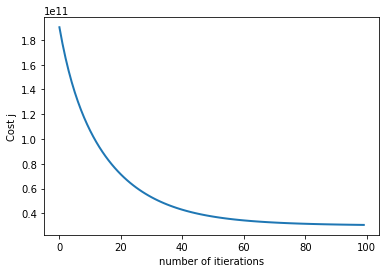

In [12]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(6) 
theta1, j_history1 = gradientDescentMulti(x_train, y_train, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
print(j_history1[num_iters-1])
plt.plot(np.arange(len(j_history1)), j_history1, lw=2)
plt.xlabel('number of itierations')
plt.ylabel('Cost j')

In [13]:
def computeCostMulti2(train_x, train_y, theta):
  #  initialize some useful values

 train_m = train_y.shape[0]  #number of training examples 

#you need to return the following variable correctly

 j=0
#===================your code here==============
 j=0
 j=np.dot((np.dot(np.square(train_x),theta)-train_y),(np.dot(np.square(train_x),theta)-train_y))/(2*train_m)
#==========================
 return j

In [14]:
def gradientDescentMulti2(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(np.square(train_x),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.square(train_x).T,sumofh0x -train_y)))
        j_history.append(computeCostMulti2(train_x, train_y, theta))
     
    return theta, j_history

Text(0, 0.5, 'cost j')

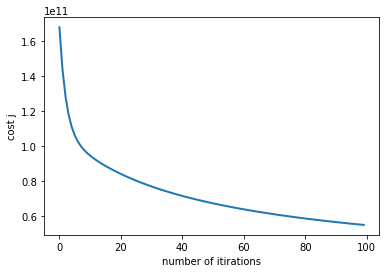

In [15]:
alpha=0.01
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta2, j_history2 = gradientDescentMulti2(x_train, y_train, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history2)), j_history2, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

In [16]:
def computeCostMulti3(train_x, train_y, theta):
  #  initialize some useful values

 train_m = train_y.shape[0]  #number of training examples 

#you need to return the following variable correctly

 j=0
#===================your code here==============
 j=0
 j =np.dot((np.dot(np.power(train_x,3),theta)-train_y),(np.dot(np.power(train_x,3),theta)-train_y))/(2*train_m)
#==========================
 return j

In [17]:
def gradientDescentMulti3(train_x, train_y, theta, alpha, num_iters):
    train_m = train_y.shape[0]
    theta=theta.copy()
    j_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(np.power(train_x,3),theta)
        theta = theta-((alpha/train_m)*(np.dot(np.power(train_x,3).T,sumofh0x -train_y)))
        j_history.append(computeCostMulti3(train_x, train_y, theta))
     
    return theta, j_history

Text(0, 0.5, 'cost j')

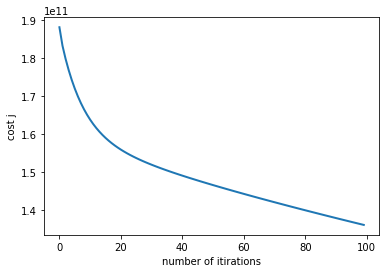

In [18]:
alpha=0.001
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta3, j_history3 = gradientDescentMulti3(x_train, y_train, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history3)), j_history3, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

Text(0, 0.5, 'Cost j')

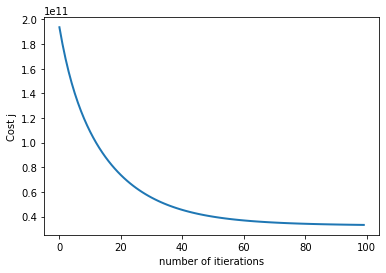

In [19]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(6) 
theta11, j_history11 = gradientDescentMulti(x_validate, y_validate, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
plt.plot(np.arange(len(j_history11)), j_history11, lw=2)
plt.xlabel('number of itierations')
plt.ylabel('Cost j')

Text(0, 0.5, 'cost j')

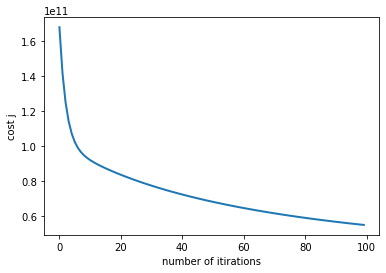

In [20]:
alpha=0.01
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta22, j_history22 = gradientDescentMulti2(x_validate, y_validate, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history22)), j_history22, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

Text(0, 0.5, 'cost j')

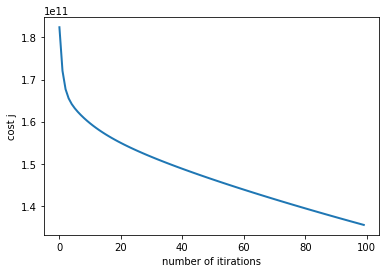

In [21]:

alpha=0.001
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta33, j_history33 = gradientDescentMulti3(x_validate, y_validate, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history33)), j_history33, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

Text(0, 0.5, 'Cost j')

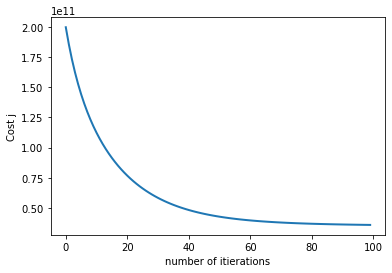

In [22]:
# choose some alpha value - change this 
alpha = 0.03
num_iters = 100

#init theta and run gradient descnt
theta = np.zeros(6) 
theta111, j_history111 = gradientDescentMulti(x_test, y_test, theta, alpha, num_iters) 
#print(j_history)
#plot the convergence graph 
plt.plot(np.arange(len(j_history111)), j_history111, lw=2)
plt.xlabel('number of itierations')
plt.ylabel('Cost j')

Text(0, 0.5, 'cost j')

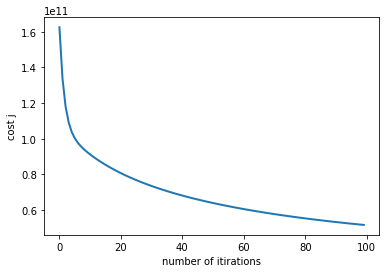

In [23]:
alpha=0.01
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta222, j_history222 = gradientDescentMulti2(x_test, y_test, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history222)), j_history222, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

Text(0, 0.5, 'cost j')

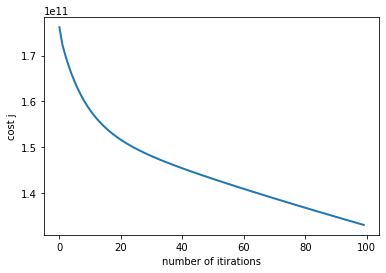

In [24]:
alpha=0.001
num_iters = 100
theta = np.zeros(6)
#intiate theta and run gradient descent 

theta333, j_history333 = gradientDescentMulti3(x_test, y_test, theta, alpha, num_iters)

#plot the convergence graph

plt.plot(np.arange(len(j_history333)), j_history333, lw=2)
plt.xlabel('number of itirations')
plt.ylabel('cost j')

In [25]:
# validate data with the theta calc in training 

Jcost1= computeCostMulti(x_validate, y_validate, theta11)
print(Jcost1)
Jcost2= computeCostMulti(x_validate, y_validate, theta22)
print(Jcost2)
Jcost3= computeCostMulti(x_validate, y_validate, theta33)
print(Jcost3)


33217521228.760025
89606908849.01582
175557972610.61404


In [26]:
print(j_history1[num_iters-1])
print(j_history2[num_iters-1])
print(j_history3[num_iters-1])

30653138406.2596
54759278783.10976
136195901937.79193


In [27]:
#for testing with the lowest degree error and thetas t

J_test= computeCostMulti(x_test, y_test, theta33)
print("test cost:",J_test)

test cost: 181943650147.06152


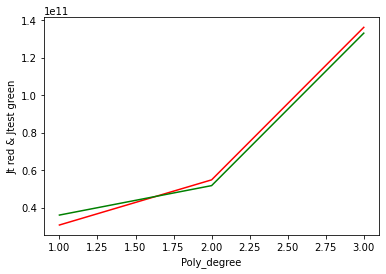

In [30]:
#Model_evaluation
#Plotting_Jtrain_&_Jtest_against_the_degree
degrees = [1, 2, 3]
Jtarray = [j_history1[num_iters-1], j_history2[num_iters-1],j_history3[num_iters-1]]
Jtestarray = [j_history111[num_iters-1], j_history222[num_iters-1],j_history333[num_iters-1]]

plt.xlabel('Poly_degree')
plt.ylabel('Jt red & Jtest green')
plt.plot(degrees,Jtarray , 'r') 
plt.plot(degrees, Jtestarray, 'g') 

#as shown in the plot the best degree found was 18
plt.show()